In [1]:
# prompt: load the dataset into a df
from itertools import combinations
from collections import defaultdict

import pandas as pd

# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('content/groceries.csv')

# Print the first 5 rows of the dataframe to verify it loaded correctly
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [2]:
df.isnull().sum()

,0
Items,0


In [3]:
# Preprocess the dataset to create a list of transactions (sets of items)
transactions = [set(items.split(',')) for items in df['Items'].dropna()]

# Check the transactions list to confirm preprocessing
print("Sample transactions:", transactions[:5])  # Display the first few transactions for verification


Sample transactions: [{'ready soups', 'margarine', 'semi-finished bread', 'citrus fruit'}, {'yogurt', 'tropical fruit', 'coffee'}, {'whole milk'}, {'meat spreads', 'yogurt', 'pip fruit', 'cream cheese '}, {'other vegetables', 'long life bakery product', 'condensed milk', 'whole milk'}]


In [4]:
# prompt: find the unique values among all the entries in df and tell their number

from collections import defaultdict

unique_items = set()
for transaction in transactions:
  for item in transaction:
    unique_items.add(item)

print("Unique items:", unique_items)
print("Number of unique items:", len(unique_items))

Unique items: {'pip fruit', 'candy', 'flower (seeds)', 'softener', 'root vegetables', 'abrasive cleaner', 'Instant food products', 'cocoa drinks', 'seasonal products', 'onions', 'baby cosmetics', 'cleaner', 'white bread', 'napkins', 'brandy', 'salty snack', 'pickled vegetables', 'herbs', 'sliced cheese', 'male cosmetics', 'pastry', 'processed cheese', 'chocolate', 'berries', 'nut snack', 'bottled beer', 'whipped/sour cream', 'dessert', 'zwieback', 'skin care', 'frozen vegetables', 'curd', 'specialty fat', 'soap', 'kitchen towels', 'mustard', 'condensed milk', 'candles', 'soups', 'long life bakery product', 'vinegar', 'beverages', 'frankfurter', 'prosecco', 'yogurt', 'chocolate marshmallow', 'liquor (appetizer)', 'whole milk', 'snack products', 'margarine', 'newspapers', 'fruit/vegetable juice', 'salt', 'honey', 'cookware', 'light bulbs', 'finished products', 'roll products ', 'syrup', 'canned fish', 'tropical fruit', 'pork', 'brown bread', 'beef', 'bottled water', 'waffles', 'UHT-milk'

In [5]:



# Create a dictionary to store the one-hot encoded data
one_hot_data = defaultdict(list)

# Iterate through each transaction
for transaction in transactions:
  # Iterate through each unique item
  for item in unique_items:
    # If the item is present in the current transaction, add 1, otherwise add 0
    if item in transaction:
      one_hot_data[item].append(1)
    else:
      one_hot_data[item].append(0)

# Create a new DataFrame from the one-hot encoded data
one_hot_df = pd.DataFrame(one_hot_data)

# Print the one-hot encoded DataFrame
one_hot_df

,pip fruit,candy,flower (seeds),softener,root vegetables,abrasive cleaner,Instant food products,cocoa drinks,seasonal products,onions,...,grapes,specialty bar,ham,misc. beverages,shopping bags,baking powder,hamburger meat,instant coffee,hard cheese,pasta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
698,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:



# Calculate the number of 1s in each row
row_sums = one_hot_df.sum(axis=1)

# Print the results
print("Number of 1s in each row:\n", row_sums)

Number of 1s in each row:
 0      4
1      3
2      1
3      4
4      4
      ..
695    5
696    7
697    7
698    5
699    4
Length: 700, dtype: int64


In [7]:
def func(data):
  for i in unique_items:
    if data[i] > 0:
      data[i] = i
  return data

In [8]:
data2 = one_hot_df.apply(func,axis=1)

<ipython-input-7-3fdba8780f9a>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'margarine' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
<ipython-input-7-3fdba8780f9a>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'yogurt' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
<ipython-input-7-3fdba8780f9a>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'whole milk' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
<ipython-input-7-3fdba8780f9a>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'pip fruit' has

In [9]:
data2.head()

,pip fruit,candy,flower (seeds),softener,root vegetables,abrasive cleaner,Instant food products,cocoa drinks,seasonal products,onions,...,grapes,specialty bar,ham,misc. beverages,shopping bags,baking powder,hamburger meat,instant coffee,hard cheese,pasta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
newdata = data2.values

In [11]:
newdata

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       ['pip fruit', 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [12]:
newdata.ndim

2

In [13]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [14]:
newdata[:10]

[['margarine', 'semi-finished bread', 'ready soups', 'citrus fruit'],
 ['yogurt', 'tropical fruit', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['condensed milk',
  'long life bakery product',
  'whole milk',
  'other vegetables'],
 ['abrasive cleaner', 'yogurt', 'whole milk', 'butter', 'rice'],
 ['rolls/buns'],
 ['bottled beer',
  'liquor (appetizer)',
  'UHT-milk',
  'rolls/buns',
  'other vegetables'],
 ['pot plants'],
 ['whole milk', 'cereals']]

In [15]:
def generate_itemsets(transactions, min_support):
    """Generate frequent itemsets using the Apriori algorithm."""
    item_counts = defaultdict(int)
    transaction_count = len(transactions)

    # Count single items
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1

    # Filter single items by min_support
    current_itemsets = {itemset: count for itemset, count in item_counts.items()
                        if count / transaction_count >= min_support}

    # Store frequent itemsets
    frequent_itemsets = {}
    frequent_itemsets.update(current_itemsets)

    # Generate itemsets of size k > 1
    k = 2
    while current_itemsets:
        candidate_itemsets = defaultdict(int)
        itemsets_list = list(current_itemsets.keys())

        # Generate candidate itemsets of size k by joining pairs of size k-1 itemsets
        for i in range(len(itemsets_list)):
            for j in range(i + 1, len(itemsets_list)):
                candidate = itemsets_list[i] | itemsets_list[j]
                if len(candidate) == k:
                    # Count support for candidate itemset
                    candidate_count = sum(1 for transaction in transactions if candidate.issubset(transaction))
                    if candidate_count / transaction_count >= min_support:
                        candidate_itemsets[candidate] += candidate_count

        # Update frequent itemsets
        frequent_itemsets.update({itemset: count for itemset, count in candidate_itemsets.items() if count > 0})
        current_itemsets = candidate_itemsets
        k += 1

    return frequent_itemsets


In [16]:
def generate_association_rules(frequent_itemsets, min_confidence):
    """Generate association rules from frequent itemsets."""
    rules = []

    for itemset, support_count in frequent_itemsets.items():
        # Generate all non-empty subsets of the itemset
        subsets = [frozenset(x) for i in range(1, len(itemset)) for x in combinations(itemset, i)]
        for subset in subsets:
            # Calculate the consequent
            consequent = itemset - subset

            if len(consequent) > 0:
                # Calculate support, confidence, and lift
                support = support_count
                support_consequent = sum(1 for k, v in frequent_itemsets.items() if consequent.issubset(k) and v > 0)
                confidence = support / support_consequent if support_consequent > 0 else 0
                lift = confidence / (support_consequent / len(frequent_itemsets))

                if confidence >= min_confidence:
                    rules.append((set(subset), set(consequent), support, confidence, lift))

    return rules


In [17]:
# Input transactions
transactions = newdata
transactions


[['margarine', 'semi-finished bread', 'ready soups', 'citrus fruit'],
 ['yogurt', 'tropical fruit', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['condensed milk',
  'long life bakery product',
  'whole milk',
  'other vegetables'],
 ['abrasive cleaner', 'yogurt', 'whole milk', 'butter', 'rice'],
 ['rolls/buns'],
 ['bottled beer',
  'liquor (appetizer)',
  'UHT-milk',
  'rolls/buns',
  'other vegetables'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['white bread',
  'chocolate',
  'tropical fruit',
  'bottled water',
  'other vegetables'],
 ['curd',
  'yogurt',
  'whole milk',
  'tropical fruit',
  'bottled water',
  'flour',
  'butter',
  'dishes',
  'citrus fruit'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['tropical fruit', 'chicken'],
 ['newspapers', 'fruit/vegetable juice', 'butter', 'sugar'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['pastry', 'b

In [18]:
# Input minimum support and generate frequent itemsets
min_support = float(input("Enter the minimum support (e.g., 0.01): "))
frequent_itemsets = generate_itemsets(transactions, min_support)

# Print frequent itemsets and their support values
print("Frequent Itemsets and Support Values:")
for itemset, support_count in frequent_itemsets.items():
    support_value = support_count / len(transactions)  # Calculate support value
    print(f"{set(itemset)}: Support Value: {support_value:.4f}")


Enter the minimum support (e.g., 0.01): 0.01
Frequent Itemsets and Support Values:
{'margarine'}: Support Value: 0.0514
{'semi-finished bread'}: Support Value: 0.0114
{'citrus fruit'}: Support Value: 0.0929
{'yogurt'}: Support Value: 0.1157
{'tropical fruit'}: Support Value: 0.0929
{'coffee'}: Support Value: 0.0671
{'whole milk'}: Support Value: 0.2514
{'pip fruit'}: Support Value: 0.0457
{'cream cheese '}: Support Value: 0.0357
{'long life bakery product'}: Support Value: 0.0229
{'other vegetables'}: Support Value: 0.1843
{'butter'}: Support Value: 0.0400
{'rolls/buns'}: Support Value: 0.2186
{'bottled beer'}: Support Value: 0.0643
{'liquor (appetizer)'}: Support Value: 0.0114
{'UHT-milk'}: Support Value: 0.0200
{'cereals'}: Support Value: 0.0114
{'white bread'}: Support Value: 0.0271
{'chocolate'}: Support Value: 0.0300
{'bottled water'}: Support Value: 0.1371
{'curd'}: Support Value: 0.0743
{'flour'}: Support Value: 0.0129
{'dishes'}: Support Value: 0.0171
{'beef'}: Support Value: 0

In [19]:
# Input minimum confidence and generate association rules
min_confidence = float(input("Enter the minimum confidence (e.g., 0.5): "))
rules = generate_association_rules(frequent_itemsets, min_confidence)

# Print association rules with their metrics
print("Association Rules:")
for rule in rules:
    antecedent, consequent, support, confidence, lift = rule
    print(f"Rule: {antecedent} -> {consequent}, Support: {support/len(transactions):.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}")


Enter the minimum confidence (e.g., 0.5): 0.5
Association Rules:
Rule: {'citrus fruit'} -> {'margarine'}, Support: 0.0100, Confidence: 1.1667, Lift: 61.0556
Rule: {'whole milk'} -> {'margarine'}, Support: 0.0257, Confidence: 3.0000, Lift: 157.0000
Rule: {'other vegetables'} -> {'margarine'}, Support: 0.0186, Confidence: 2.1667, Lift: 113.3889
Rule: {'rolls/buns'} -> {'margarine'}, Support: 0.0171, Confidence: 2.0000, Lift: 104.6667
Rule: {'yogurt'} -> {'citrus fruit'}, Support: 0.0157, Confidence: 0.5789, Lift: 9.5679
Rule: {'tropical fruit'} -> {'citrus fruit'}, Support: 0.0200, Confidence: 0.7368, Lift: 12.1773
Rule: {'citrus fruit'} -> {'tropical fruit'}, Support: 0.0200, Confidence: 0.6667, Lift: 9.9683
Rule: {'whole milk'} -> {'citrus fruit'}, Support: 0.0300, Confidence: 1.1053, Lift: 18.2659
Rule: {'other vegetables'} -> {'citrus fruit'}, Support: 0.0271, Confidence: 1.0000, Lift: 16.5263
Rule: {'rolls/buns'} -> {'citrus fruit'}, Support: 0.0271, Confidence: 1.0000, Lift: 16.526

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_top_n_frequent_itemsets(frequent_itemsets, n=5):
    """Visualize the top-N frequent itemsets using a bar chart."""
    # Sort frequent itemsets by support count
    sorted_itemsets = sorted(frequent_itemsets.items(), key=lambda x: x[1], reverse=True)

    # Get top N itemsets
    top_n_itemsets = sorted_itemsets[:n]

    # Prepare data for plotting
    itemset_labels = [str(set(itemset)) for itemset, _ in top_n_itemsets]
    support_values = [count for _, count in top_n_itemsets]

    # Create bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=support_values, y=itemset_labels, palette='viridis')
    plt.title(f'Top-{n} Frequent Itemsets')
    plt.xlabel('Support Count')
    plt.ylabel('Itemsets')
    plt.show()


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_top_n_strongest_rules(rules, n=5):
    """Visualize the top-N strongest rules using a scatter plot with jitter and print rule details."""
    # Sort rules by lift and select the top-N
    sorted_rules = sorted(rules, key=lambda x: x[4], reverse=True)
    top_n_rules = sorted_rules[:n]

    # Prepare data for plotting
    antecedents = [' & '.join(map(str, rule[0])) for rule in top_n_rules]
    consequents = [' & '.join(map(str, rule[1])) for rule in top_n_rules]
    supports = [rule[2] / len(transactions) for rule in top_n_rules]  # Normalized support
    confidences = [rule[3] for rule in top_n_rules]
    lifts = np.array([rule[4] for rule in top_n_rules])

    # Add a small jitter to prevent overlapping points
    supports_jittered = np.array(supports) + np.random.normal(0, 0.000001, size=len(supports))
    lifts_jittered = lifts + np.random.normal(0, 0.000001, size=len(lifts))

    # Create scatter plot with uniform mark points
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=lifts_jittered, y=supports_jittered, s=100, marker='o', color='b', alpha=0.6)

    # Annotate points with rule details
    for i in range(len(top_n_rules)):
        plt.annotate(f"{antecedents[i]} -> {consequents[i]}", (lifts_jittered[i], supports_jittered[i]), fontsize=9, ha='right')

    plt.title(f'Top-{n} Strongest Rules (by Lift)')
    plt.xlabel('Lift')
    plt.ylabel('Normalized Support')
    plt.grid()
    plt.show()

    # Print rule details separately
    print(f"Top {n} Strongest Rules:")
    print(f"{'Antecedent':<50} {'Consequent':<50} {'Support':<10} {'Confidence':<10} {'Lift':<10}")
    print("="*120)
    for i in range(n):
        print(f"{antecedents[i]:<50} {consequents[i]:<50} {supports[i]:<10.6f} {confidences[i]:<10.4f} {lifts[i]:<10.4f}")




In [22]:
def summarize_results(frequent_itemsets, rules):
    """Generate a detailed report summarizing the frequent patterns and association rules."""
    print("\nFrequent Itemsets Summary:")
    for itemset, count in frequent_itemsets.items():
        support_value = count / len(transactions)
        print(f"Itemset: {set(itemset)}, Support Count: {count}, Support Value: {support_value:.4f}")

    print("\nAssociation Rules Summary:")
    for rule in rules:
        antecedent, consequent, support, confidence, lift = rule
        print(f"Rule: {antecedent} -> {consequent}, Support: {support/len(transactions):.6f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}")


<ipython-input-20-6cdb79a80546>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=support_values, y=itemset_labels, palette='viridis')


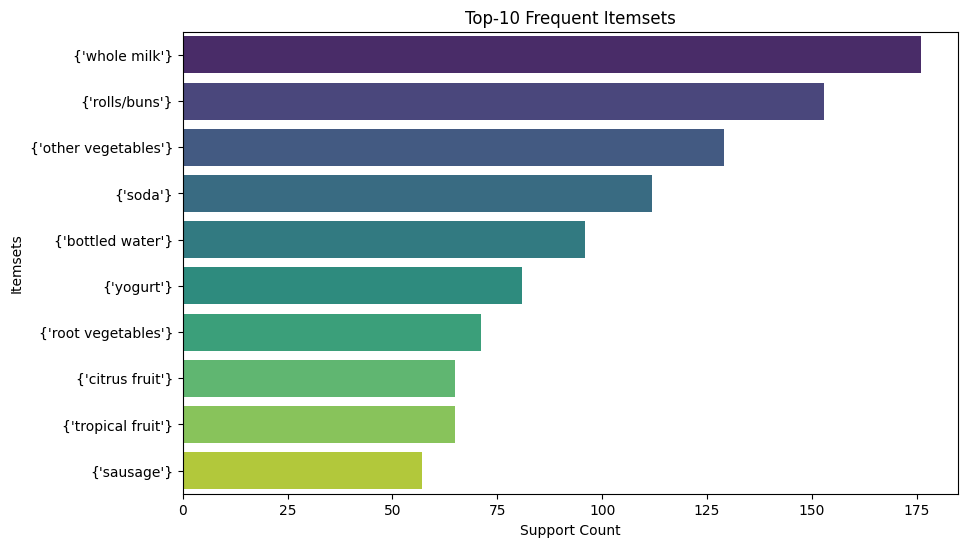

In [23]:
# Plot Top 10 Frequent Itemsets
plot_top_n_frequent_itemsets(frequent_itemsets, n=10)


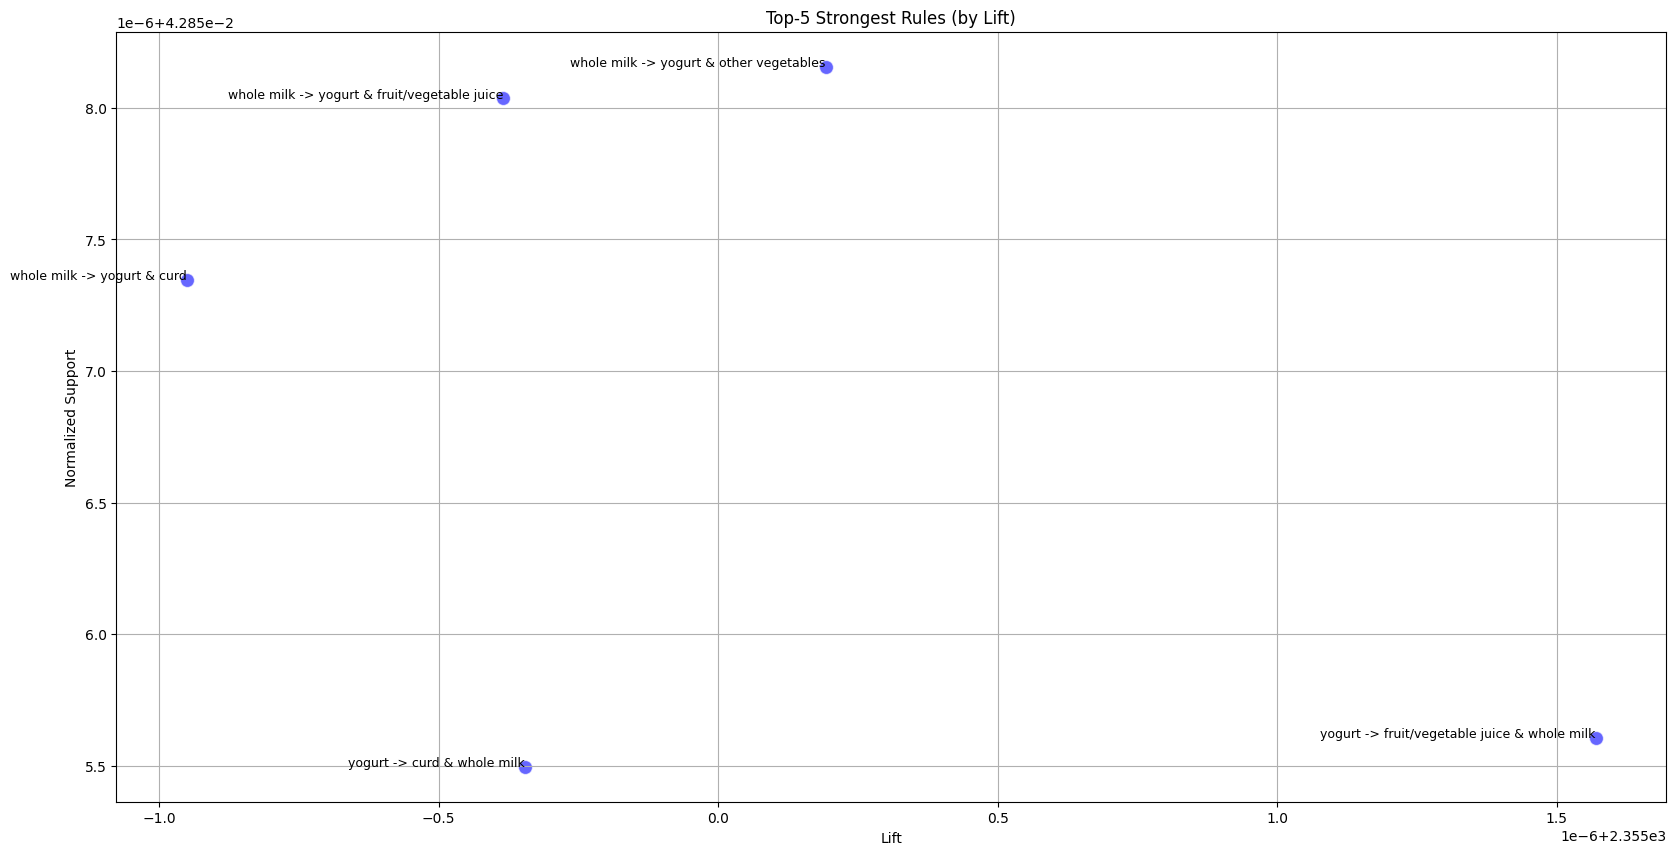

Top 5 Strongest Rules:
Antecedent                                         Consequent                                         Support    Confidence Lift      
whole milk                                         yogurt & other vegetables                          0.042857   15.0000    2355.0000 
yogurt                                             curd & whole milk                                  0.042857   15.0000    2355.0000 
whole milk                                         yogurt & curd                                      0.042857   15.0000    2355.0000 
yogurt                                             fruit/vegetable juice & whole milk                 0.042857   15.0000    2355.0000 
whole milk                                         yogurt & fruit/vegetable juice                     0.042857   15.0000    2355.0000 


In [24]:
# Plot Top 10 Strongest Rules
plot_top_n_strongest_rules(rules, n=5)


# Bonus Part

In [25]:
import itertools

def generate_association_rules(frequent_itemsets, transactions, min_confidence, min_leverage=None, min_conviction=None):
    """Generate association rules with support, confidence, lift, leverage, and conviction."""
    rules = []
    transaction_count = len(transactions)

    # Calculate support for individual items
    item_supports = {itemset: support / transaction_count for itemset, support in frequent_itemsets.items()}

    # Generate rules for each frequent itemset
    for itemset in frequent_itemsets:
        if len(itemset) < 2:
            continue  # Skip if itemset cannot form a rule

        for antecedent in itertools.chain.from_iterable(itertools.combinations(itemset, r) for r in range(1, len(itemset))):
            antecedent = frozenset(antecedent)
            consequent = itemset - antecedent

            if consequent:
                antecedent_support = item_supports[antecedent]
                consequent_support = item_supports[consequent]
                rule_support = frequent_itemsets[itemset] / transaction_count
                confidence = rule_support / antecedent_support
                lift = confidence / consequent_support

                # Calculate leverage and conviction
                leverage = rule_support - (antecedent_support * consequent_support)
                # Avoid infinity for conviction by setting a high value if confidence is 1
                conviction = ((1 - consequent_support) / (1 - confidence)) if confidence < 1 else 10**6

                # Apply minimum confidence and additional thresholds if specified
                if confidence >= min_confidence:
                    if (min_leverage is None or leverage >= min_leverage) and \
                       (min_conviction is None or conviction >= min_conviction):
                        rules.append((antecedent, consequent, rule_support, confidence, lift, leverage, conviction))

    return rules

# Example usage
# Assume 'frequent_itemsets' is a dictionary containing itemsets as keys and their support counts as values
# Assume 'transactions' is a list of transactions (each transaction is a set of items)

# User inputs
min_confidence = float(input("Enter minimum confidence (e.g., 0.1): "))
min_leverage = float(input("Enter minimum leverage (e.g., 0.005) or leave blank: ") or 0.01)
min_conviction = float(input("Enter minimum conviction (e.g., 0.8) or leave blank: ") or 1.2)

# Generate association rules with specified thresholds
rules = generate_association_rules(frequent_itemsets, transactions, min_confidence, min_leverage, min_conviction)

# Print the generated rules
print("\nGenerated Association Rules with Leverage and Conviction:")
for rule in rules:
    antecedent, consequent, support, confidence, lift, leverage, conviction = rule
    print(f"Rule: {set(antecedent)} -> {set(consequent)}")
    print(f"  Support: {support:.4f}, Confidence: {confidence:.4f}, Lift: {lift:.4f}, Leverage: {leverage:.4f}, Conviction: {conviction:.4f}")
    print("="*60)


Enter minimum confidence (e.g., 0.1): 0.1
Enter minimum leverage (e.g., 0.005) or leave blank: 0.005
Enter minimum conviction (e.g., 0.8) or leave blank: 0.8

Generated Association Rules with Leverage and Conviction:
Rule: {'margarine'} -> {'citrus fruit'}
  Support: 0.0100, Confidence: 0.1944, Lift: 2.0940, Leverage: 0.0052, Conviction: 1.1261
Rule: {'citrus fruit'} -> {'margarine'}
  Support: 0.0100, Confidence: 0.1077, Lift: 2.0940, Leverage: 0.0052, Conviction: 1.0631
Rule: {'margarine'} -> {'whole milk'}
  Support: 0.0257, Confidence: 0.5000, Lift: 1.9886, Leverage: 0.0128, Conviction: 1.4971
Rule: {'whole milk'} -> {'margarine'}
  Support: 0.0257, Confidence: 0.1023, Lift: 1.9886, Leverage: 0.0128, Conviction: 1.0566
Rule: {'margarine'} -> {'other vegetables'}
  Support: 0.0186, Confidence: 0.3611, Lift: 1.9595, Leverage: 0.0091, Conviction: 1.2768
Rule: {'other vegetables'} -> {'margarine'}
  Support: 0.0186, Confidence: 0.1008, Lift: 1.9595, Leverage: 0.0091, Conviction: 1.0549

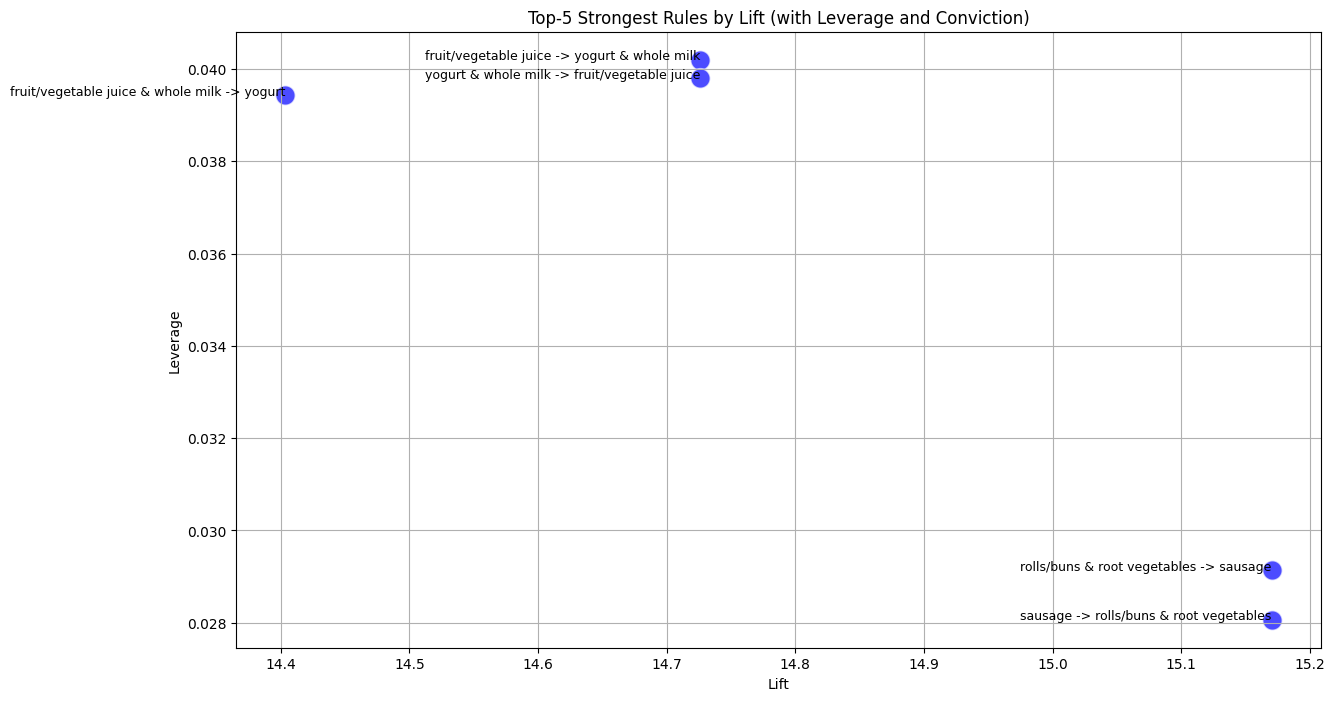

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_top_n_strongest_rules(rules, transactions, n=5):
    """Visualize the top-N strongest rules using a scatter plot with jitter to avoid overlapping points and print details."""
    # Sort rules by lift and select the top-N
    sorted_rules = sorted(rules, key=lambda x: x[4], reverse=True)[:n]  # x[4] is lift
    antecedents = [' & '.join(map(str, rule[0])) for rule in sorted_rules]
    consequents = [' & '.join(map(str, rule[1])) for rule in sorted_rules]
    lifts = [rule[4] for rule in sorted_rules]
    leverages = [rule[5] for rule in sorted_rules]
    convictions = [rule[6] for rule in sorted_rules]

    # Add a small jitter to lift and leverage to avoid overlapping
    lifts_jittered = np.array(lifts) + np.random.normal(0, 0.0005, size=len(lifts))
    leverages_jittered = np.array(leverages) + np.random.normal(0, 0.0005, size=len(leverages))

    # Plotting
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x=lifts_jittered, y=leverages_jittered, s=200, alpha=0.7, marker='o', color='blue')  # Fixed marker symbol
    plt.xlabel("Lift")
    plt.ylabel("Leverage")
    plt.title(f"Top-{n} Strongest Rules by Lift (with Leverage and Conviction)")

    # Annotate each point with rule info
    for i in range(len(sorted_rules)):
        plt.annotate(f"{antecedents[i]} -> {consequents[i]}", (lifts_jittered[i], leverages_jittered[i]), fontsize=9, ha='right')

    plt.grid(True)
    plt.show()

    # Print rule details separately
    print(f"Top {n} Strongest Rules:")
    print(f"{'Antecedent':<50} {'Consequent':<50} {'Lift':<10} {'Leverage':<10} {'Conviction':<10}")
    print("="*120)
    for i in range(n):
        print(f"{antecedents[i]:<50} {consequents[i]:<50} {lifts[i]:<10.4f} {leverages[i]:<10.4f} {convictions[i]:<10.4f}")

# Example usage
plot_top_n_strongest_rules(rules, transactions, n=5)


# Part - II

In [27]:
# prompt: write code to get unique items in transactions

def get_unique_items(transactions):
  """
  Finds all unique items present in a list of transactions.

  Args:
    transactions: A list of transactions, where each transaction is a list or set of items.

  Returns:
    A set of unique items.
  """
  unique_items = set()
  for transaction in transactions:
    for item in transaction:
      unique_items.add(item)
  return unique_items



unique_items = get_unique_items(transactions)
print(unique_items)  # Output: {1, 2, 3, 4, 5}

Top 5 Strongest Rules:
Antecedent                                         Consequent                                         Lift       Leverage   Conviction
sausage                                            rolls/buns & root vegetables                       15.1703    0.0280     1.5449    
rolls/buns & root vegetables                       sausage                                            15.1703    0.0280     1000000.0000
fruit/vegetable juice                              yogurt & whole milk                                14.7265    0.0399     2.7477    
yogurt & whole milk                                fruit/vegetable juice                              14.7265    0.0399     28.9629   
fruit/vegetable juice & whole milk                 yogurt                                             14.4033    0.0399     1000000.0000
{'pip fruit', 'candy', 'flower (seeds)', 'softener', 'root vegetables', 'abrasive cleaner', 'Instant food products', 'cocoa drinks', 'seasonal products', 'onions',

In [28]:
category_support_map = {
    # High-Frequency Essentials
    'whole milk': 0.02, 'yogurt': 0.02, 'soda': 0.02, 'root vegetables': 0.02,
    'rolls/buns': 0.02, 'tropical fruit': 0.02, 'domestic eggs': 0.02, 'other vegetables': 0.02,

    # Moderate-Frequency Household Items
    'detergent': 0.03, 'kitchen towels': 0.03, 'toilet cleaner': 0.03, 'cling film/bags': 0.03,
    'softener': 0.03, 'napkins': 0.03, 'soap': 0.03, 'bathroom cleaner': 0.03,

    # Low-Frequency Specialty/Seasonal Products
    'specialty cheese': 0.05, 'red/blush wine': 0.05, 'white wine': 0.05, 'sparkling wine': 0.05,
    'liquor': 0.05, 'prosecco': 0.05, 'brandy': 0.05, 'rum': 0.05,

    # Promotion-Focused Items
    'snack products': 0.01, 'candy': 0.01, 'frozen dessert': 0.01, 'pastry': 0.01,
    'ice cream': 0.01, 'popcorn': 0.01, 'specialty chocolate': 0.01, 'salty snack': 0.01,

    # General Groceries (defaults to mid-range)
    'canned beer': 0.03, 'bottled water': 0.03, 'processed cheese': 0.03, 'cream cheese': 0.03,
    'fruit/vegetable juice': 0.03, 'coffee': 0.03, 'canned fish': 0.03, 'tea': 0.03,

    # Catch-all for items not specifically categorized
    'default': 0.04
}


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, chain
from collections import defaultdict
import numpy as np


In [30]:
# Function to apply dynamic minimum support with default fallback
def get_dynamic_support(item, category_support_map):
    return category_support_map.get(item, category_support_map['default'])


In [31]:
def apriori(transactions, min_support, category_support_map=None):
    item_counts = defaultdict(int)
    total_transactions = len(transactions)

    # Step 1: Generate 1-itemsets
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1

    # Apply dynamic minimum support based on item category, if provided
    frequent_itemsets = {itemset: count / total_transactions
                         for itemset, count in item_counts.items()
                         if count / total_transactions >= (get_dynamic_support(list(itemset)[0], category_support_map) if category_support_map else min_support)}

    k = 2
    current_itemsets = frequent_itemsets

    # Step 2: Generate larger itemsets
    while current_itemsets:
        candidate_itemsets = defaultdict(int)

        # Generate candidate itemsets of size k
        itemsets_list = list(current_itemsets.keys())
        for i in range(len(itemsets_list)):
            for j in range(i + 1, len(itemsets_list)):
                candidate = itemsets_list[i] | itemsets_list[j]
                if len(candidate) == k:
                    # Count candidate support
                    candidate_count = sum(1 for transaction in transactions if candidate.issubset(transaction))
                    if candidate_count / total_transactions >= min_support:
                        candidate_itemsets[candidate] = candidate_count / total_transactions

        # Update frequent itemsets
        current_itemsets = {itemset: support for itemset, support in candidate_itemsets.items()}
        frequent_itemsets.update(current_itemsets)
        k += 1

    return frequent_itemsets


In [32]:
# Profitability mapping for various items
profitability_map = {
    # High Profit
    'specialty cheese': 0.09, 'red/blush wine': 0.09, 'white wine': 0.09, 'sparkling wine': 0.09,
    'liquor': 0.09, 'prosecco': 0.09, 'brandy': 0.09, 'rum': 0.09, 'specialty chocolate': 0.09,

    # Moderate Profit
    'whole milk': 0.06, 'yogurt': 0.06, 'fruit/vegetable juice': 0.06, 'bottled water': 0.06,
    'domestic eggs': 0.06, 'root vegetables': 0.06, 'detergent': 0.06, 'coffee': 0.06,
    'canned fish': 0.06, 'tea': 0.06, 'beef': 0.06, 'pork': 0.06,

    # Low Profit
    'rolls/buns': 0.03, 'brown bread': 0.03, 'white bread': 0.03, 'potato products': 0.03,
    'canned beer': 0.03, 'napkins': 0.03, 'cling film/bags': 0.03, 'bathroom cleaner': 0.03,
    'canned vegetables': 0.03, 'salt': 0.03, 'margarine': 0.03, 'soda': 0.03,

    # Promotion-Focused
    'snack products': 0.05, 'candy': 0.05, 'frozen dessert': 0.05, 'pastry': 0.05,
    'ice cream': 0.05, 'popcorn': 0.05, 'specialty bar': 0.05, 'salty snack': 0.05,
    'chocolate': 0.05, 'soft drinks': 0.05,

    # General Groceries (defaults to mid-range)
    'processed cheese': 0.05, 'cream cheese': 0.05, 'jam': 0.05, 'butter': 0.05,
    'rice': 0.05, 'sausage': 0.05,

    # Catch-all for items not specifically categorized
    'default': 0.04
}

def get_profitability(item, profitability_map):
    """Retrieve the profitability of an item from the profitability map.

    Args:
        item (str): The item for which to retrieve profitability.
        profitability_map (dict): The mapping of items to profitability values.

    Returns:
        float: The profitability of the item, or the default value if not found.
    """
    return profitability_map.get(item, profitability_map['default'])




In [33]:
import pandas as pd

def generate_rules(frequent_itemsets, min_confidence, transactions, profitability_map):
    """Generate association rules from frequent itemsets with profitability weighting.

    Args:
        frequent_itemsets (list): List of frequent itemsets.
        min_confidence (float): Minimum confidence threshold for rules.
        transactions (list): List of transactions.
        profitability_map (dict): The mapping of items to profitability values.

    Returns:
        pd.DataFrame: DataFrame of generated rules with support, confidence, and profitability.
    """
    rules = []

    for itemset in frequent_itemsets:
        if len(itemset) < 2:
            continue  # Skip itemsets with less than 2 items

        # Generate all possible rules from the itemset
        for item in itemset:
            antecedent = [i for i in itemset if i != item]
            support = get_support(antecedent + [item], transactions)  # Calculate support for the rule
            antecedent_support = get_support(antecedent, transactions)

            # Calculate confidence only if antecedent support is greater than 0
            confidence = support / antecedent_support if antecedent_support > 0 else 0

            # Add rule only if it meets the confidence threshold
            if confidence >= min_confidence:
                # Get profitability values for the itemset
                profitability_values = [get_profitability(i, profitability_map) for i in itemset]
                average_profitability = sum(profitability_values) / len(profitability_values)

                rules.append({
                    'Antecedent': antecedent,
                    'Consequent': item,
                    'Support': support,
                    'Confidence': confidence,
                    'Profitability': average_profitability  # Add profitability to the rule
                })

    # Convert rules to DataFrame
    if rules:  # Only create a DataFrame if there are rules
        rules_df = pd.DataFrame(rules)
    else:
        rules_df = pd.DataFrame(columns=['Antecedent', 'Consequent', 'Support', 'Confidence', 'Profitability'])

    # Ensure Lift is calculated
    if not rules_df.empty and 'Lift' not in rules_df.columns:
        rules_df['Lift'] = (
            rules_df['Confidence'] / (rules_df['Support'] / len(transactions))
        )

    return rules_df

def get_support(itemset, transactions):
    """Calculate the support for a given itemset."""
    count = sum(1 for transaction in transactions if set(itemset).issubset(set(transaction)))
    return count / len(transactions) if len(transactions) > 0 else 0


In [34]:

# Visualization for top-N frequent itemsets
def plot_top_frequent_itemsets(frequent_itemsets, N=10):
    top_itemsets = sorted(frequent_itemsets.items(), key=lambda x: x[1], reverse=True)[:N]
    items, supports = zip(*top_itemsets)
    items = [' & '.join(list(item)) for item in items]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=supports, y=items, palette="viridis")
    plt.xlabel("Support")
    plt.ylabel("Frequent Itemsets")
    plt.title(f"Top-{N} Frequent Itemsets")
    plt.show()

# Visualization for top-N strongest rules based on Lift
def plot_top_strongest_rule(rules_df, N=10):
    top_rules = rules_df.sort_values(by="Lift", ascending=False).head(N)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Confidence", y="Lift", size="Support", data=top_rules, hue="Lift", palette="coolwarm", legend=False)
    plt.xlabel("Confidence")
    plt.ylabel("Lift")
    plt.title(f"Top-{N} Strongest Rules (by Lift)")
    plt.show()


Enter minimum confidence threshold (as a decimal): 0.1


<ipython-input-34-a43f222e147a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=supports, y=items, palette="viridis")


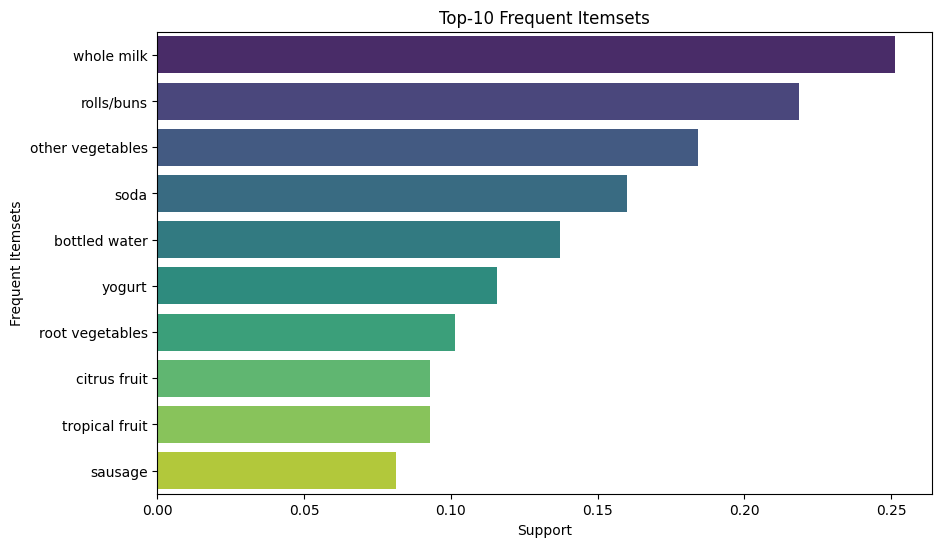

In [35]:
# Example usage with user inputs
min_support = 0.3
min_confidence =float(input("Enter minimum confidence threshold (as a decimal): "))

# Generate frequent itemsets with dynamic support thresholds
frequent_itemsets = apriori(transactions, min_support, category_support_map=category_support_map)

# Generate association rules with profitability weighting
rules_df = generate_rules(
    frequent_itemsets,     # List of frequent itemsets
    min_confidence,       # Minimum confidence threshold
    transactions,         # List of transactions
    profitability_map     # Profitability mapping
)


# Ensure Lift is calculated in rules_df
if 'Lift' not in rules_df.columns:
    rules_df['Lift'] = (
        rules_df['Confidence'] / (rules_df['Support'] / len(transactions))  # Update to use 'Support' instead of 'RHS Support'
    )

# Plot top-N frequent itemsets
plot_top_frequent_itemsets(frequent_itemsets, N=10)



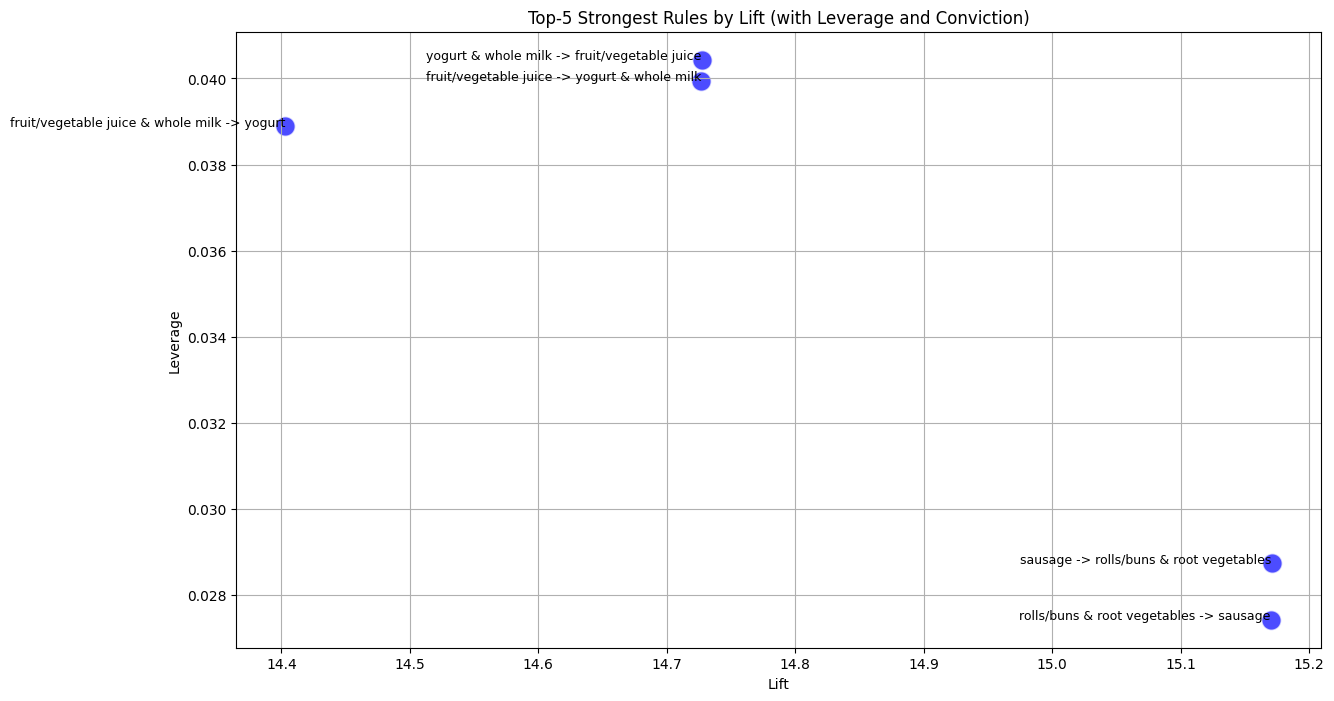

Top 5 Strongest Rules:
Antecedent                                         Consequent                                         Lift       Leverage   Conviction
sausage                                            rolls/buns & root vegetables                       15.1703    0.0280     1.5449    
rolls/buns & root vegetables                       sausage                                            15.1703    0.0280     1000000.0000
fruit/vegetable juice                              yogurt & whole milk                                14.7265    0.0399     2.7477    
yogurt & whole milk                                fruit/vegetable juice                              14.7265    0.0399     28.9629   
fruit/vegetable juice & whole milk                 yogurt                                             14.4033    0.0399     1000000.0000


In [36]:
# Plot top-N strongest rules based on lift and profitability
plot_top_n_strongest_rules(rules, transactions)